In [1]:
import tensorflow as tf
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from tensorflow import keras
import os
import sys
import scipy as sp

In [2]:
os.environ['CUDA_VISIBLE_DEVICES'] = ''
print(os.environ['CUDA_VISIBLE_DEVICES'])

In [3]:
sys.path.append('../src/cWGAN/')
import keras_wgan

In [4]:
save_dir = '../src/cWGAN/training_checkpoints/'
assert(os.path.isdir(save_dir))

In [5]:
wgan = keras_wgan.WGAN()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 14, 14, 16)        160       
_________________________________________________________________
leaky_re_lu (LeakyReLU)      (None, 14, 14, 16)        0         
_________________________________________________________________
dropout (Dropout)            (None, 14, 14, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 7, 7, 32)          4640      
_________________________________________________________________
zero_padding2d (ZeroPadding2 (None, 8, 8, 32)          0         
_________________________________________________________________
batch_normalization (BatchNo (None, 8, 8, 32)          128       
_________________________________________________________________
leaky_re_lu_1 (LeakyReLU)    (None, 8, 8, 32)          0

In [54]:
wgan.generator.load_weights('../src/cWGAN/training_checkpoints/gen_3900')

In [55]:
noise = np.random.normal(0, 1, (5, wgan.latent_dim))

In [56]:
gen_imgs = wgan.generator.predict(noise)

In [57]:
print(gen_imgs[0].shape)

(28, 28, 1)


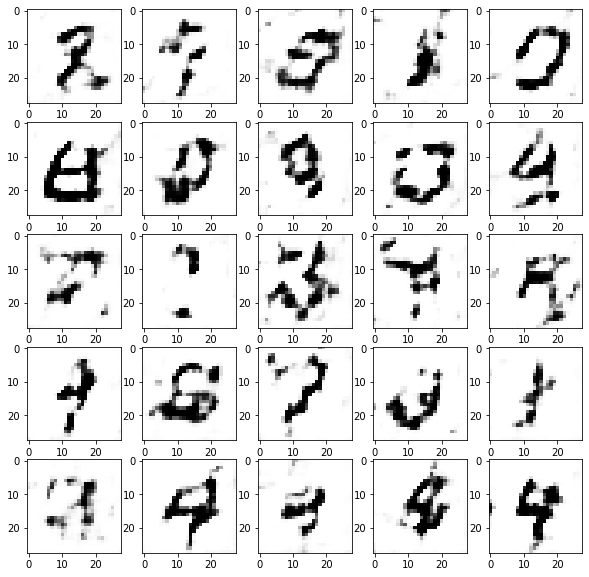

In [59]:
fig, axs = plt.subplots(5, 5, figsize=(10, 10))
for i in range(5):
    noise = np.random.normal(0, 1, (5, wgan.latent_dim))
    gen_imgs = wgan.generator.predict(noise)
    for j in range(5):
        axs[j, i].imshow(gen_imgs[j], cmap='Greys')
plt.show()